# Python: Data visualization

This script and the associated data are found [here](https://github.com/maglet/2020-fall-python-plotting/)

We'll be using the `pandas` and `plotnine` packages to load and visualize data.

### Install libraries

If you don't have them installed already, uncomment and run the following cell to install `plotnine` and `pandas` via conda. 
* `pandas` should come installed with Anaconda
* `plotnine` does not
* if you're not sure, skip down to **loading packages** section. If the loading step fails, try installing

In [3]:
#conda install -c conda-forge plotnine
#conda install pandas

### Loading libraries

To use the functions in `plotnine` and `pandas`, run the following code to load these libraries with aliases `p9` and `pd`.

In [1]:
import plotnine as p9
import pandas as pd

If you get a message like:

`ModuleNotFoundError: No module named 'plotnine'`

go back and install the module.

### Loading the data

Use the `pandas` function `read_csv` to load the data. 

In [6]:
surveys_complete = pd.read_csv('data/surveys_complete.csv')

The data are formatted as follows:
* each row is an inidvidual animal trapped by field scientists
* each column has data about the trapped animals 

In [6]:
surveys_complete

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_g
0,63,8,19,1977,3,DM,M,35.0,40.0,40000.0
1,64,8,19,1977,7,DM,M,37.0,48.0,48000.0
2,65,8,19,1977,4,DM,F,34.0,29.0,29000.0
3,66,8,19,1977,4,DM,F,35.0,46.0,46000.0
4,67,8,19,1977,7,DM,M,35.0,36.0,36000.0
...,...,...,...,...,...,...,...,...,...,...
30671,35541,12,31,2002,15,PB,F,24.0,31.0,31000.0
30672,35542,12,31,2002,15,PB,F,26.0,29.0,29000.0
30673,35543,12,31,2002,15,PB,F,27.0,34.0,34000.0
30674,35547,12,31,2002,10,RM,F,15.0,14.0,14000.0


### Plotting basics 

The `plotnine` library is based on the `ggplot` package in R. 

These plots require at least 3 elements:
* The DataFrame that contains the data
* What you want on the x and y axes (aka mappings)
* The shapes you want to represent your data (aka geoms)

If you only specify the data, you get a blank plot.

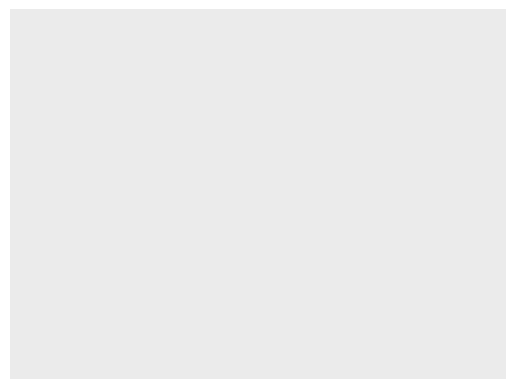

<ggplot: (8778604669985)>

In [7]:
(p9.ggplot(data=surveys_complete))

If you specify data and mappings, you get axes that are scaled to the data, but no data points.

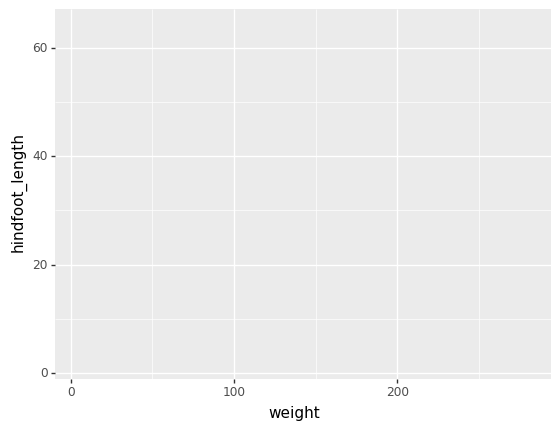

<ggplot: (8775790872609)>

In [18]:
(p9.ggplot(data = surveys_complete, 
           mapping = p9.aes(x = 'weight', 
                            y = 'hindfoot_length')))

To get a more or less complete plot, you have to specify all 3: data, mappings and geoms, the last of which tells python how to draw the data.

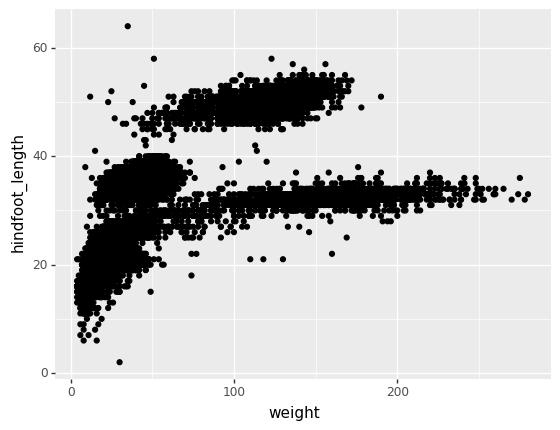

<ggplot: (8775792473265)>

In [17]:
(p9.ggplot(data = surveys_complete, 
           mapping = p9.aes(x = 'weight', 
                            y = 'hindfoot_length'))+ 
 p9.geom_point())

### Modifying your plots

`plotnine` has many ways that you can modify your plot to suit your needs.

#### Fix overplotting

In this plot, it's hard to see all of the data, because the points overlap so much. To get a better idea of where the points are the densest, we can use the `alpha` parameter in the `geom_point` function to make the points less opaque.

(`alpha = 0.1` means the points are 1/10 as opaque)

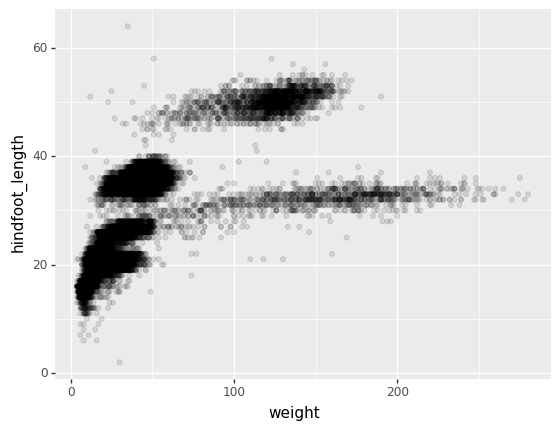

<ggplot: (8775790459129)>

In [16]:
(p9.ggplot(data = surveys_complete, 
           mapping = p9.aes(x = 'weight', 
                            y = 'hindfoot_length'))+ 
 p9.geom_point(alpha = 0.1))

### Add some color

You can specify what color you want the points to be using the `color` parameter.

For a list of valid color names, see [here](https://python-graph-gallery.com/python-colors/)

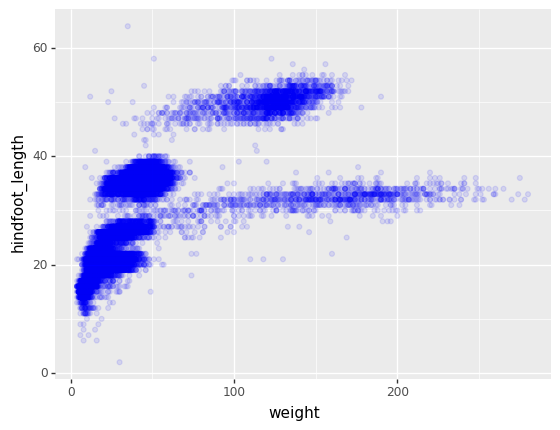

<ggplot: (8775790645877)>

In [15]:
(p9.ggplot(data = surveys_complete, 
           mapping = p9.aes(x = 'weight', 
                            y = 'hindfoot_length'))+ 
 p9.geom_point(alpha = 0.1, 
              color = "blue"))

#### Color by species

You could also color the points by a category, like `species_id`. However, the `color` parameter must go in the aes function, because it references the dataset.

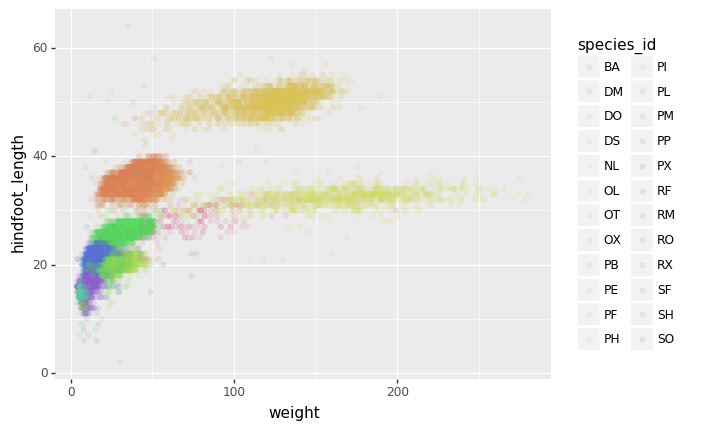

<ggplot: (8775790413797)>

In [14]:
(p9.ggplot(data = surveys_complete, 
           mapping = p9.aes(x = 'weight', 
                            y = 'hindfoot_length',
                            color = 'species_id'))+ 
 p9.geom_point(alpha = 0.1))

### Challenge

Add color to the data points according to the plot from which the sample was taken (plot_id).

Hint: Check the data type for `plot_id`. Why does this change how plotnine makes the graph?

### Answer

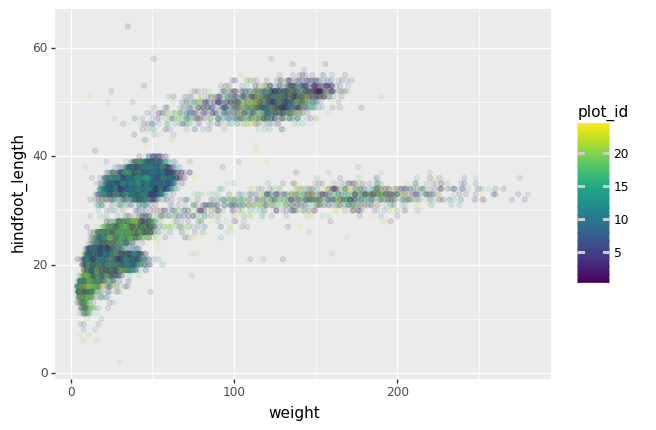

<ggplot: (8775795596693)>

In [19]:
(p9.ggplot(data = surveys_complete, 
           mapping = p9.aes(x = 'weight', 
                            y = 'hindfoot_length',
                            color = 'plot_id'))+ 
p9.geom_point(alpha = 0.1))

### Plotting categories

You can use text, or categorical variables on the axes as well. Here's what it looks like.

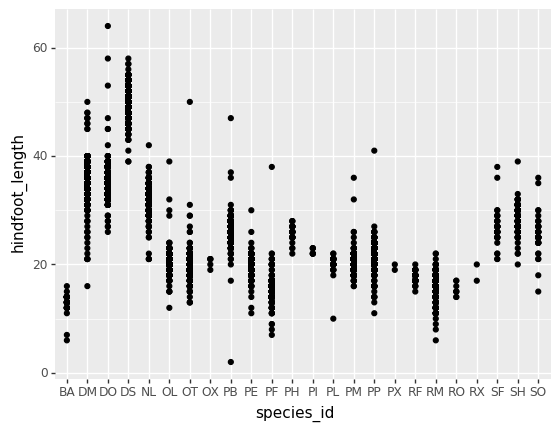

<ggplot: (8778583210317)>

In [25]:
(p9.ggplot(surveys_complete, 
           p9.aes(x = 'species_id', 
                  y = 'hindfoot_length')) +
 p9.geom_point())

### Other geoms

The example above is even more overplotted than the previous!

To spread them out a bit, we can use another geom that will spread the points out within the species bin: `geom_jitter`.

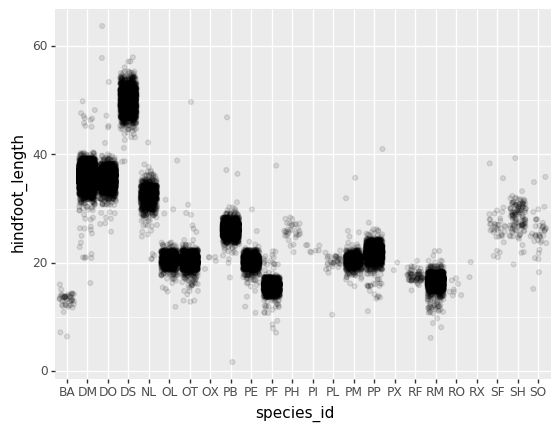

<ggplot: (8775792455709)>

In [20]:
(p9.ggplot(surveys_complete, 
            p9.aes(x = 'species_id', 
                   y = 'hindfoot_length')) +
 p9.geom_jitter(alpha = 0.1))

### Boxplots

That helped a little, but likely the most appropriate way to display this data is with a box plot using `geom_boxplot`.
* The middle line is the median
* The ends of the box represent the 2nd and 3rd quartiles
* the ends of the "whiskers" represent the 1st and 3rd quartiles
* the individual points are generally considered outliers.

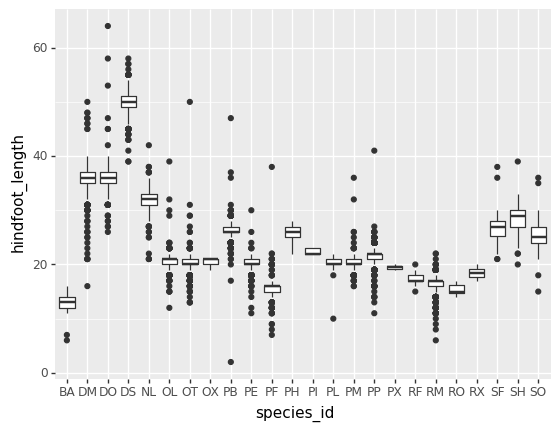

<ggplot: (8775790872705)>

In [21]:
(p9.ggplot(surveys_complete, 
            p9.aes(x = 'species_id', 
                   y = 'hindfoot_length')) +
 p9.geom_boxplot())

### Layering geoms

You can overlay multiple geoms over each other and change color and opacity parameters for each geom.

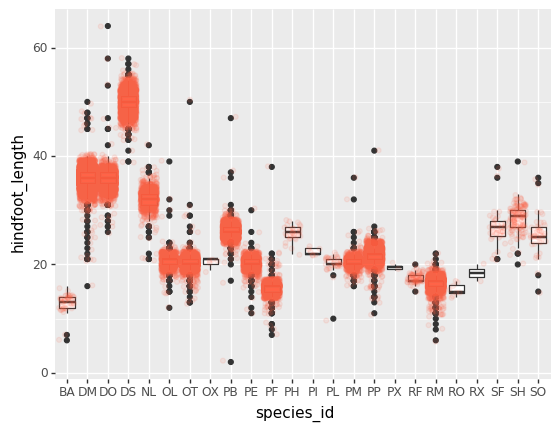

<ggplot: (8778582479721)>

In [28]:
(p9.ggplot(surveys_complete, 
            p9.aes(x = 'species_id', 
                   y = 'hindfoot_length')) +
 p9.geom_boxplot() +
 p9.geom_jitter(alpha = 0.1,                       
                color = "tomato"))

Be careful, because order matters!

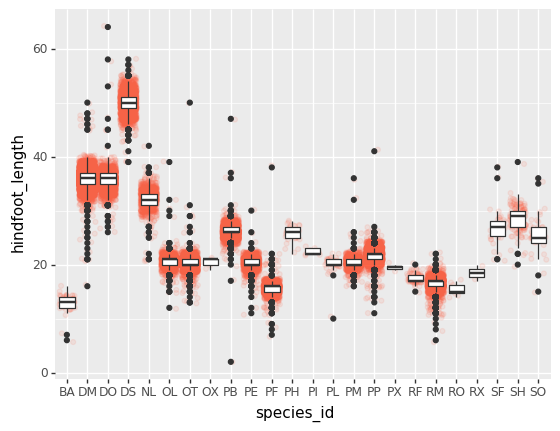

<ggplot: (8778581850629)>

In [29]:
(p9.ggplot(surveys_complete, 
            p9.aes(x = 'species_id', 
                   y = 'hindfoot_length')) +
p9.geom_jitter(alpha = 0.1,                       
                     color = "tomato") +
 p9.geom_boxplot())


### Challenge


Plot the same data as in the previous example, but as a Violin plot
Hint: see p9.geom_violin().

What information does this give you about the data that a box plot does?

### Answer

It shows you more detail about the shape of the data. 

/Users/cmtobin/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


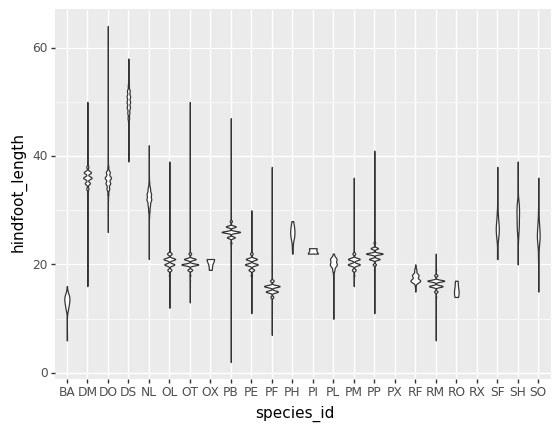

<ggplot: (8775773558753)>

In [26]:
(p9.ggplot(surveys_complete, 
            p9.aes(x = 'species_id', 
                   y = 'hindfoot_length')) +
 p9.geom_violin())

### Plotting data over time

Let's say that we want to see a plot of the number of observations for each species for each year over time. 

To do this, we'd need a data column that has the number of observations for each species for each year. 

To get this column, we need to do some magic with `pandas` to research the data.

The following code:
* groups the data by year and species id
* selects the species_id column
* counts the number of observations in the specified groups

In [34]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()

The data then looks a little funny.

In [30]:
print(yearly_counts)

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64


If we look at the type, we can see that it's a series, not a DataFrame. We haven't talked about series, but what we really want here is to get it back into a data frame.

We can do this using the `reset_index` function

In [32]:
type(yearly_counts)

pandas.core.frame.DataFrame

We can also use the name parameter to give the count column a name.

In [35]:
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


Now we can plot the data. Let's start with the 3 basic elements: data, mappings, and geoms.

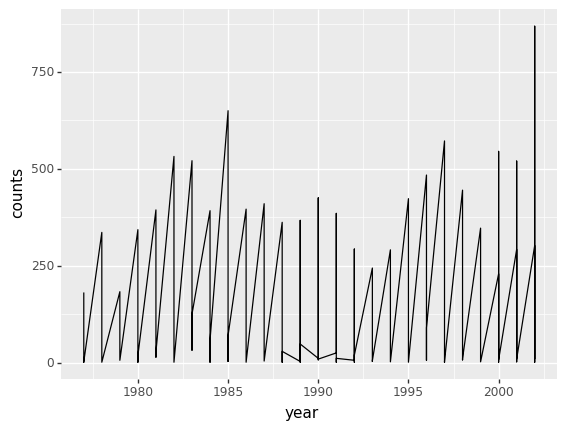

<ggplot: (8775773836869)>

In [36]:
(p9.ggplot(yearly_counts, 
           p9.aes(x = 'year',
                  y = 'counts')) +
 p9.geom_line())

This plot isn't very informative, because it lumps all of the species together. To separate each species out into a separate line, we can use the `group` parameter in the `aes` function.

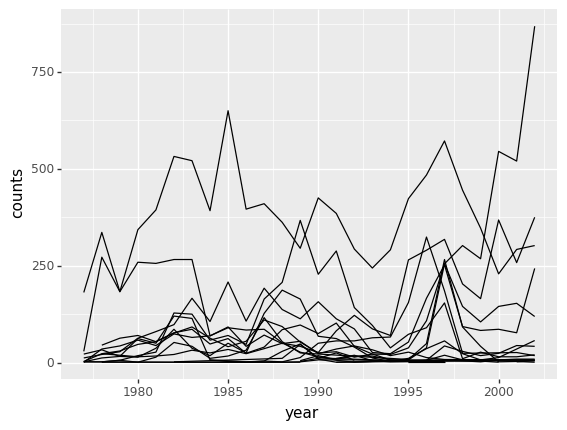

<ggplot: (8775795943397)>

In [37]:
(p9.ggplot(yearly_counts, 
            p9.aes(x = 'year',
                   y = 'counts',
                   group = 'species_id')) +
 p9.geom_line())

But now we can't tell which line corresponds to which species. To create a legend, all we have to do is give lines color using the `color` parameter instead of `group`:

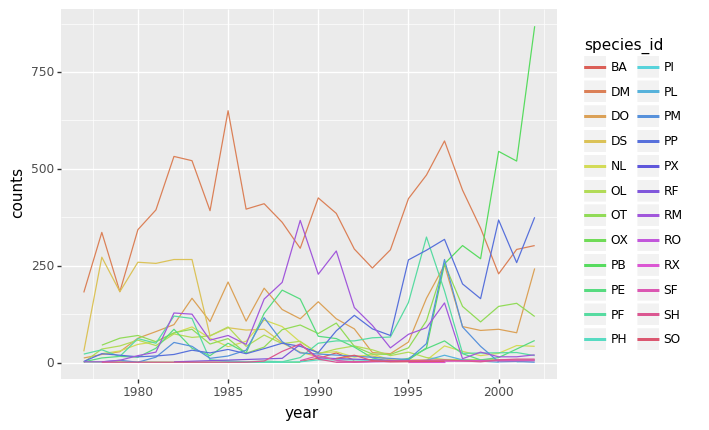

<ggplot: (8778564888797)>

In [70]:
(p9.ggplot(yearly_counts, 
            p9.aes(x = 'year',
                   y = 'counts',
                   color = 'species_id')) +
 p9.geom_line())

### Saving plots to objects

All the information python needs to make a plot can be stored in an object using `=` (aka the assignment operator).



In [39]:
lineplot = (p9.ggplot(yearly_counts, 
            p9.aes(x = 'year',
                   y = 'counts',
                   color = 'species_id')) +
            p9.geom_line())

To print out the plot, call it by its name

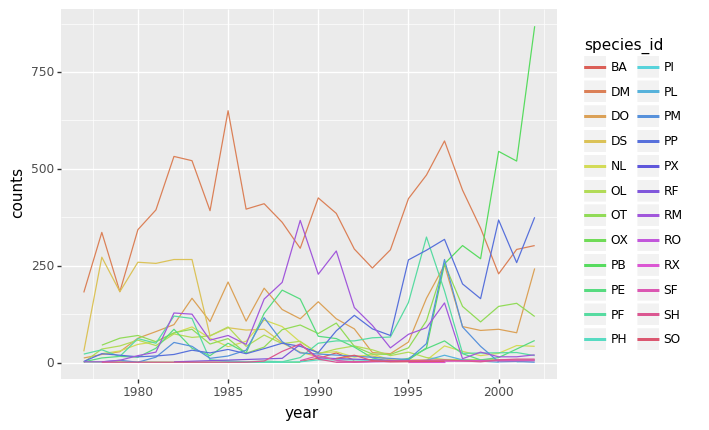

<ggplot: (8775773472997)>

In [40]:
lineplot

### Challenge

* Using colors, create a plot that depicts how the average weight of each species changes through the years.

* Save it to an object called mean_weight_sp

* Hint: reshape the data using the following code

`yearly_weight = surveys_complete.groupby(['year', 'species_id']).mean()['weight']
yearly_weight = yearly_weight.reset_index(name='mean_weight')`



In [41]:
yearly_weight = surveys_complete.groupby(['year', 'species_id']).mean()['weight']

In [42]:
yearly_weight

year  species_id
1977  DM             41.143646
      DO             42.666667
      DS            122.034483
      OL             21.000000
      OX             22.000000
                       ...    
2002  PP             17.021333
      RM             10.000000
      RO             10.142857
      SF             67.400000
      SH             64.666667
Name: weight, Length: 332, dtype: float64

In [43]:
yearly_weight = yearly_weight.reset_index(name='mean_weight')
yearly_weight

,year,species_id,mean_weight
0,1977,DM,41.143646
1,1977,DO,42.666667
2,1977,DS,122.034483
3,1977,OL,21.000000
4,1977,OX,22.000000
...,...,...,...
327,2002,PP,17.021333
328,2002,RM,10.000000
329,2002,RO,10.142857
330,2002,SF,67.400000


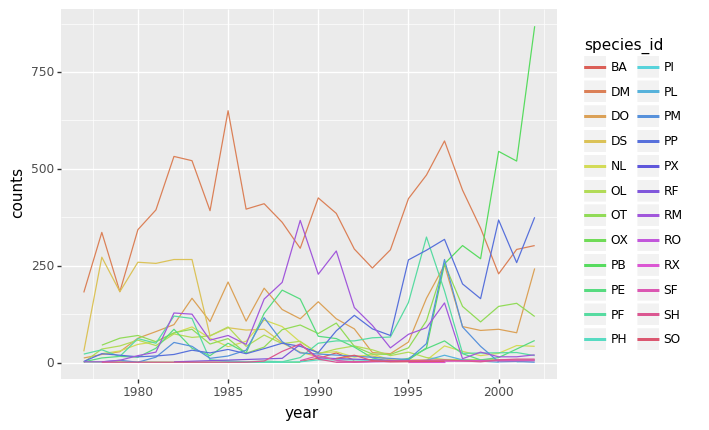

<ggplot: (8775773472997)>

In [44]:
(p9.ggplot(yearly_weight, 
            p9.aes(x = 'year',
                   y = 'mean_weight',
color = 'species_id')) +
p9.geom_line())

lineplot

### Creating publication quality plots

While ggplots look pretty good out of the box, they might not be suitable for publication because of the default colored backgrounds, font size, axis labels, etc.

We can use `themes` to alter these attributes and apply them to many plots for a uniform look.

#### Applying pre-made themes

For example, let's apply the black and white theme (`theme_bw`) to our time series plot

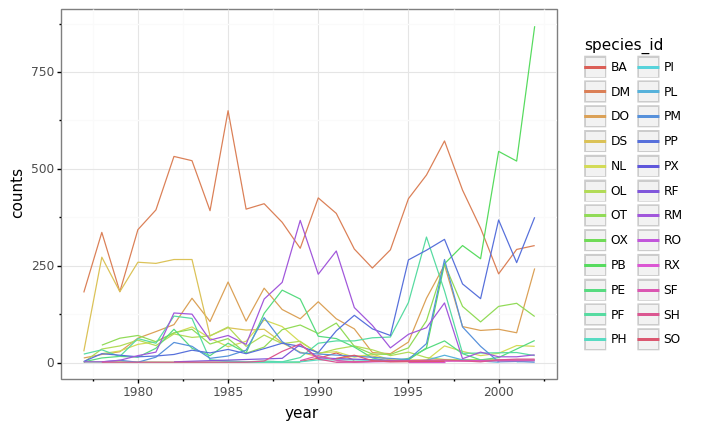

<ggplot: (8775820410473)>

In [47]:
line_bw = (lineplot +  
            p9.theme_bw())
line_bw

### Adding plot labels

We can also use the labs function to add custom labels to the plot.

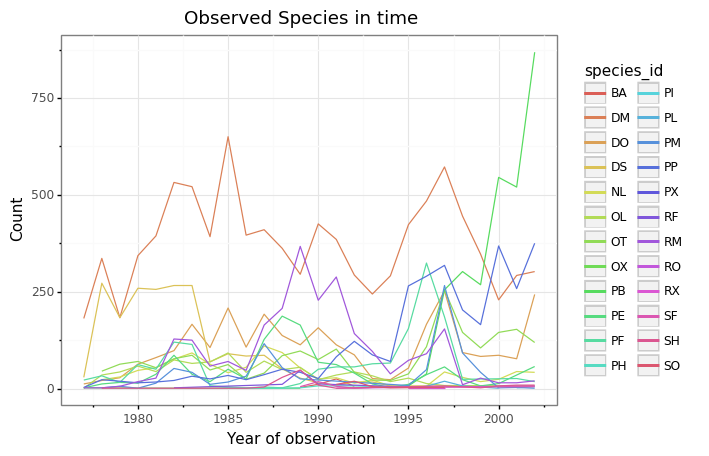

<ggplot: (8775821275121)>

In [48]:
line_bw_lab = (line_bw + 
 p9.labs(title = 'Observed Species in time',
         x = 'Year of observation', 
         y = 'Count') )
line_bw_lab

### Changing text size

You can also increase the font size to make the labels more readable.

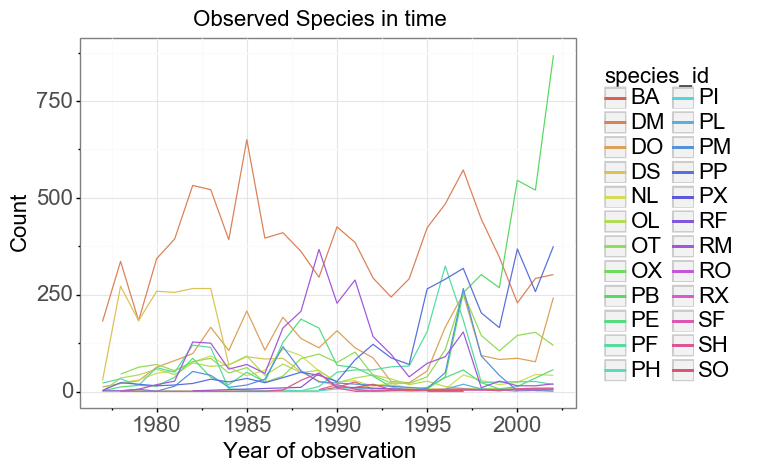

<ggplot: (8775823737613)>

In [49]:
line_bw_labs_font = (line_bw_lab + 
p9.theme(text=p9.element_text(size=16, 
                                            family="Arial")))
line_bw_labs_font

### Saving themes

Best of all, you can save these options to an object that can be applied to other plots. 

In [50]:
arial_theme = (p9.theme_bw() + 
          p9.theme(text = p9.element_text(size=12, family="Arial")))


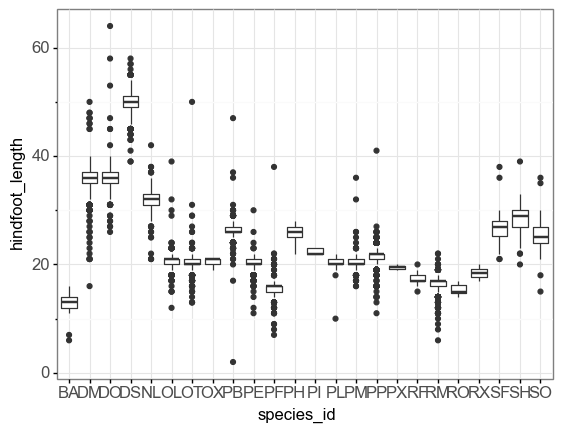

<ggplot: (8775773819409)>

In [51]:
(p9.ggplot(surveys_complete, 
            p9.aes(x = 'species_id', 
                   y = 'hindfoot_length')) +
 p9.geom_boxplot()+
 arial_theme)


### Saving plots to a file

You can also save these plots to a file on your computer 

In [52]:
p9.ggsave( filename = "for_pub.png",
               #last plot by default
               plot = line_bw_labs_font,
               device = "png",  #default
               units = "in",        #default 
               width = 15, 
               height = 10)

/Users/cmtobin/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 15 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cmtobin/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: for_pub.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


### Facets

Sometimes, you have enough data that it might be better to split it into multiple plots. `Facets` allow you to do this in a uniform way with only one extra line of code. 

* `facet_wrap` lets you split the data by a category and lay them out in order
* `facet_grid` lets you split the data by multiple categories and display them on an x-y grid.

Let's look at `facet_wrap` first

/Users/cmtobin/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


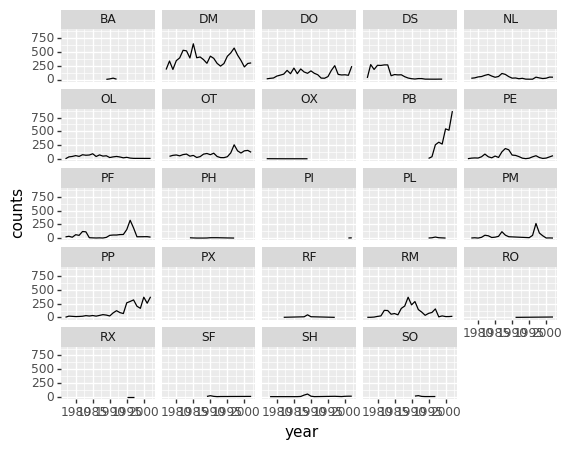

<ggplot: (8775820615893)>

In [53]:
(p9.ggplot(yearly_counts,
            p9.aes(x = "year", 
                   y = "counts")) +
 p9.geom_line() +
 p9.facet_wrap("species_id"))

To split by 2 catagories, we have to reshape the data again to include sex

In [54]:
year_sp_sex = surveys_complete.groupby(['year', 'species_id','sex'])['species_id'].count()
year_sp_sex = year_sp_sex.reset_index(name='count')
year_sp_sex

,year,species_id,sex,count
0,1977,DM,F,75
1,1977,DM,M,106
2,1977,DO,F,10
3,1977,DO,M,2
4,1977,DS,F,18
...,...,...,...,...
622,2002,RO,M,4
623,2002,SF,F,1
624,2002,SF,M,4
625,2002,SH,F,2


We can facet by species id and color by sex.

/Users/cmtobin/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


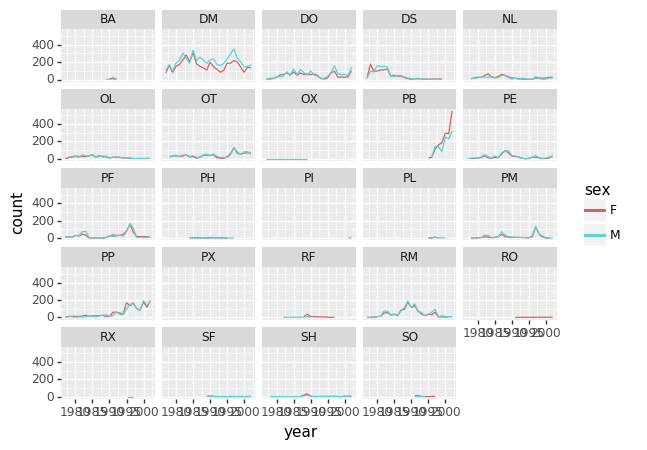

<ggplot: (8775820959357)>

In [55]:
(p9.ggplot(year_sp_sex, 
            p9.aes(x = 'year', 
                   y = 'count', 
                   color = 'sex')) +
     p9.geom_line() +
     p9.facet_wrap('species_id'))

We can also use facet grid to only split on sex and color by species id. 

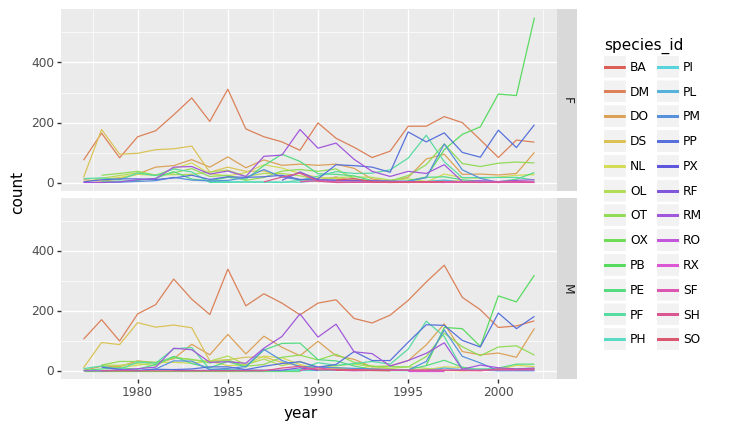

<ggplot: (8775790358577)>

In [56]:
(p9.ggplot(year_sp_sex, 
            p9.aes(x = 'year', 
                   y = 'count', 
                   color = 'species_id')) +
     p9.geom_line() +
     p9.facet_grid('sex ~ .'))

If we reverse the order of the equation, we can change the orientation of the plots. 

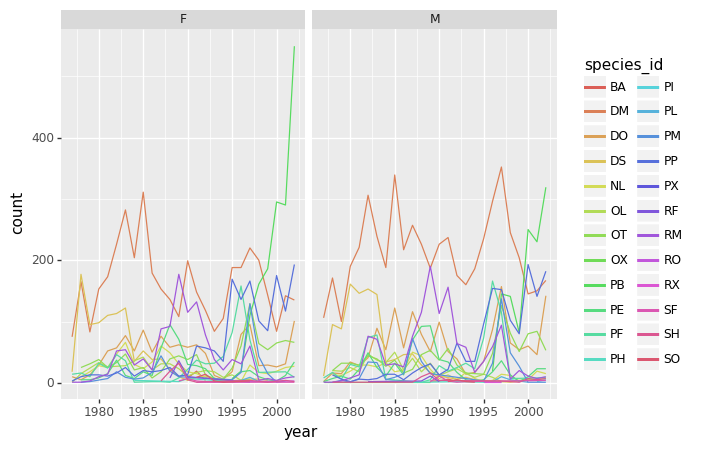

<ggplot: (8775774463985)>

In [57]:
(p9.ggplot(year_sp_sex, 
            p9.aes(x = 'year', 
                   y = 'count', 
                   color = 'species_id')) +
     p9.geom_line() +
     p9.facet_grid('.~ sex'))

We can also specify that we want rows of species ids and columns of sex, and make plots with only data that fits into those categories

/Users/cmtobin/opt/anaconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


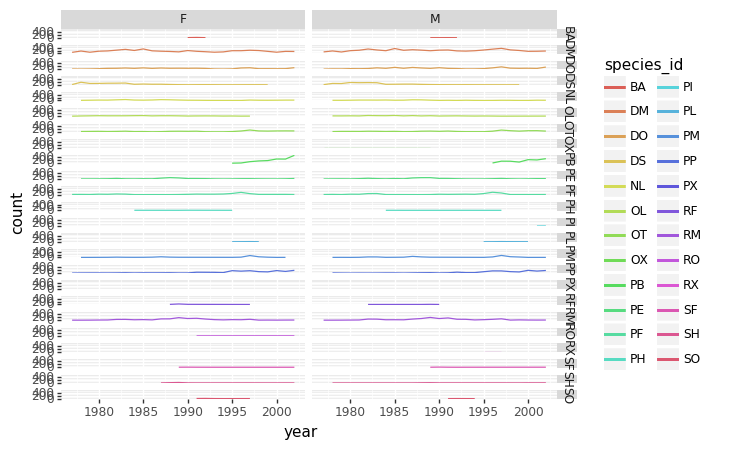

<ggplot: (8775774886377)>

In [58]:
(p9.ggplot(year_sp_sex, 
            p9.aes(x = 'year', 
                   y = 'count', 
                   color = 'species_id')) +
     p9.geom_line() +
     p9.facet_grid('species_id~ sex'))